<a href="https://colab.research.google.com/github/standroidbeta/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [3]:
result

<Response [200]>

In [4]:
type(result)

requests.models.Response

In [5]:
result.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [6]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [8]:
soup

<!DOCTYPE html>
<html>
<head>
<title>Talks | PyCon 2019 in Cleveland, Ohio</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet"/>
<link href="/2019/site_media/static/css/slight.673caeca693d.css" media="all" rel="stylesheet" type="text/css"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/simple-grid.d1149de00d41.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" property="og:image"/>
<link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
<script>
  

In [9]:
type(soup)

bs4.BeautifulSoup

In [10]:
soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [11]:
type(soup.select('h2'))

list

In [12]:
len(soup.select('h2'))

95

In [0]:
first = soup.select('h2')[0]

In [14]:
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [15]:
type(first)

bs4.element.Tag

In [16]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [17]:
type(first.text)

str

In [18]:
# remove whitespace
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [19]:
soup.select('h2')[-1]

<h2>
<a href="/2019/schedule/presentation/191/" id="presentation-191">
        Working with Time Zones: Everything You Wish You Didn't Need to Know
      </a>
</h2>

In [20]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [21]:
for tag in soup.select('h2'):
  title = tag.text.strip()
  print(title)

5 Steps to Build Python Native GUI Widgets for BeeWare
8 things that happen at the dot:  Attribute Access & Descriptors
Account Security Patterns: How Logged-In Are you?
Ace Your Technical Interview Using Python
Advanced asyncio: Solving Real-world Production Problems
A Guide to Software Engineering for Visually Impaired
A Medieval DSL? Parsing Heraldic Blazons with Python!
A New Era in Python Governance
API Evolution the Right Way
A Right Stitch-up: Creating embroidery patterns with Pillow
A Snake in the Bits: Security Automation with Python
Assets in Django without losing your hair
Attracting the Invisible Contributors
Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing
Break the Cycle: Three excellent Python tools to automate repetitive tasks
Building a Culture of Observability
Building an Open Source Artificial Pancreas
Building reproducible Python applications for secured environments
But, Why is the (Django) Admin Slow?
Coded Readers: Using Python to uncover surprising

In [22]:
titles = [tag.text.strip()
          for tag in soup.select('h2')]

titles

['5 Steps to Build Python Native GUI Widgets for BeeWare',
 '8 things that happen at the dot:  Attribute Access & Descriptors',
 'Account Security Patterns: How Logged-In Are you?',
 'Ace Your Technical Interview Using Python',
 'Advanced asyncio: Solving Real-world Production Problems',
 'A Guide to Software Engineering for Visually Impaired',
 'A Medieval DSL? Parsing Heraldic Blazons with Python!',
 'A New Era in Python Governance',
 'API Evolution the Right Way',
 'A Right Stitch-up: Creating embroidery patterns with Pillow',
 'A Snake in the Bits: Security Automation with Python',
 'Assets in Django without losing your hair',
 'Attracting the Invisible Contributors',
 'Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing',
 'Break the Cycle: Three excellent Python tools to automate repetitive tasks',
 'Building a Culture of Observability',
 'Building an Open Source Artificial Pancreas',
 'Building reproducible Python applications for secured environments',
 'But, Why is 

In [23]:
type(titles), len(titles)

(list, 95)

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [0]:
long_titles = []

for title in titles:
  if len(title) > 80:
    long_titles.append(title)
    

### 2. List Comprehension

In [115]:
[title for title in titles
  if len(titles) > 80]

['5 Steps to Build Python Native GUI Widgets for BeeWare',
 '8 things that happen at the dot:  Attribute Access & Descriptors',
 'Account Security Patterns: How Logged-In Are you?',
 'Ace Your Technical Interview Using Python',
 'Advanced asyncio: Solving Real-world Production Problems',
 'A Guide to Software Engineering for Visually Impaired',
 'A Medieval DSL? Parsing Heraldic Blazons with Python!',
 'A New Era in Python Governance',
 'API Evolution the Right Way',
 'A Right Stitch-up: Creating embroidery patterns with Pillow',
 'A Snake in the Bits: Security Automation with Python',
 'Assets in Django without losing your hair',
 'Attracting the Invisible Contributors',
 'Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing',
 'Break the Cycle: Three excellent Python tools to automate repetitive tasks',
 'Building a Culture of Observability',
 'Building an Open Source Artificial Pancreas',
 'Building reproducible Python applications for secured environments',
 'But, Why is 

In [28]:
def long(title):
  return len(title) > 80

long('Python is good')

False

In [32]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

### 4. Filter with anonymous function

In [36]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [41]:
df = pd.DataFrame({'title' : titles})

df.shape

(95, 1)

In [42]:
df.head()

,title
0,5 Steps to Build Python Native GUI Widgets for BeeWare
1,8 things that happen at the dot: Attribute Access & Descriptors
2,Account Security Patterns: How Logged-In Are you?
3,Ace Your Technical Interview Using Python
4,Advanced asyncio: Solving Real-world Production Problems


In [44]:
df[df['title'].str.len() > 80]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [46]:
condition = df['title'].str.len() > 80
df[condition]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df['title'].apply(len)


In [49]:
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [65]:
df.loc[ df['title length'] > 80, ['title']]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


### long title

In [0]:
df['long title'] = df['title length'] > 80

In [59]:
df.shape

(95, 3)

In [60]:
df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [61]:
df[ df['long title']==True]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [63]:
df[~df['long title']]

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False
5,A Guide to Software Engineering for Visually Impaired,53,False
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False
7,A New Era in Python Governance,30,False
8,API Evolution the Right Way,27,False
9,A Right Stitch-up: Creating embroidery patterns with Pillow,59,False


### first letter

In [0]:
# 'Python is great:'[0]

df['first letter'] = df['title'].str[0]

In [73]:
df[ df['first letter']=='P']

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [75]:
# 'Python is good!'.startswith('P')
df[ df['title'].str.startswith('P') ]

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [80]:
df[ df['title'].str.contains('Python')]

,title,title length,long title,first letter
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
3,Ace Your Technical Interview Using Python,41,False,A
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False,A
7,A New Era in Python Governance,30,False,A
10,A Snake in the Bits: Security Automation with Python,52,False,A
14,Break the Cycle: Three excellent Python tools to automate repetitive tasks,74,False,B
17,Building reproducible Python applications for secured environments,66,False,B
19,Coded Readers: Using Python to uncover surprising patterns in the books you love,80,False,C
20,Code Review Skills for Pythonistas,34,False,C
21,CUDA in your Python: Effective Parallel Programming on the GPU,62,False,C


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [25]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 7.2MB/s 


In [0]:
import textstat

In [85]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)

print(df.shape)
df.head()

(95, 5)


,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [86]:
df[ df['title word count'] <= 3]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
# df = df.rename(columns={'title length' : 'title character count'})
df = df.rename(columns={'title charater count' : 'title character count'})

In [104]:
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [98]:
df.describe()

,title charater count,title word count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [105]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Everything at Once: Python's Many Concurrency Models,NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,7.978947
std,NaN,17.729509,NaN,NaN,3.218890
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,37.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [106]:
df.describe(exclude='number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Everything at Once: Python's Many Concurrency Models,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [107]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


Titles sorted reverse alphabetically

In [116]:
df.sort_values(by='first letter', ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [117]:
df['first letter'].value_counts()

T    12
A    11
M     8
P     8
E     7
B     6
S     6
H     5
D     4
L     4
W     4
G     4
C     3
F     3
I     2
R     2
t     1
5     1
O     1
8     1
¡     1
U     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [118]:
df['long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

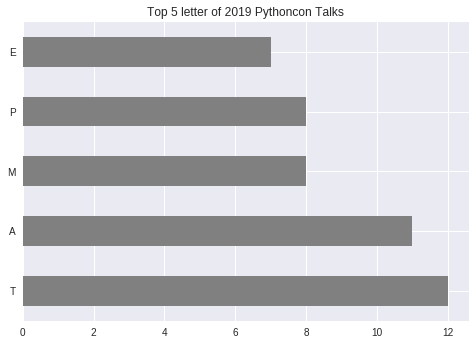

In [109]:
(df['first letter']
.value_counts()
.head(5)
.plot
.barh(color='gray',
     title="Top 5 letter of 2019 Pythoncon Talks"));

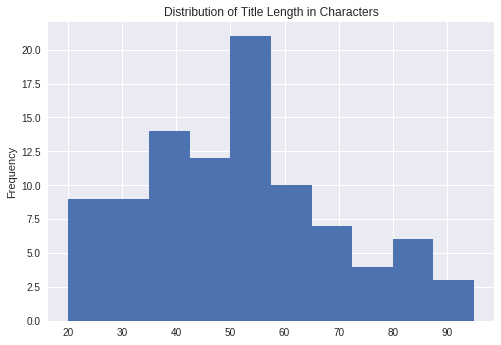

In [119]:
title = "Distribution of Title Length in Characters"
df['title character count'].plot.hist(title=title);

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?




In [165]:
soup.find_all('div', id='presentation-description')

[]

In [169]:
soup.select('div.presentation-description')

type('.presentation-description')

str

In [158]:
for tag in soup.select('div.presentation-description'):
  title_description = tag.text.strip()
  print(title_description)

Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.
We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol work

In [175]:
descriptions = [desc.text for desc in soup.select('.presentation-description')]

descriptions

["Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 'We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descri

In [180]:
desc_df = pd.DataFrame({'.presentation-description' : descriptions})

pd.options.display.max_colwidth = 10000

desc_df.shape

(95, 1)

In [181]:
desc_df.head()

,.presentation-description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model.\r\n"
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.\r\n"
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? \r\n\r\nIn this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity."
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid."


In [182]:
desc_df = desc_df.rename(columns={'.presentation-description' : 'Presentation Description'})

desc_df.head()

,Presentation Description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model.\r\n"
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.\r\n"
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? \r\n\r\nIn this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity."
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid."


In [183]:
desc_df['Presentation Description Character Count'] = desc_df['Presentation Description'].apply(len)

# desc_df = desc_df.drop(columns =  ['Description Character Count'])

desc_df.head()

,Presentation Description,Presentation Description Character Count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",766
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model.\r\n",298
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.\r\n",428
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? \r\n\r\nIn this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity.",508
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid.",647


In [184]:
desc_df['Presentation Description Word Count'] = desc_df['Presentation Description'].apply(textstat.lexicon_count)

print(desc_df.shape)
desc_df.head()

(95, 3)


,Presentation Description,Presentation Description Character Count,Presentation Description Word Count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",766,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model.\r\n",298,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.\r\n",428,66
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? \r\n\r\nIn this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity.",508,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid.",647,96


In [185]:
desc_df.describe()

,Presentation Description Character Count,Presentation Description Word Count
count,95.000000,95.000000
mean,813.789474,130.821053
std,416.074535,64.357872
min,122.000000,20.000000
25%,543.500000,85.500000
50%,719.000000,116.000000
75%,1017.000000,165.000000
max,2827.000000,421.000000


In [186]:
desc_df.describe(include='all')

,Presentation Description,Presentation Description Character Count,Presentation Description Word Count
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,"Extracting tables from PDFs is hard. The Portable Document Format was not designed for tabular data. Sadly, a lot of open data is shared as PDFs and getting tables out for analysis is a pain. A simple copy-and-paste from a PDF into a text file or spreadsheet program doesn't work.\r\n\r\nThis talk will briefly touch upon the history of the Portable Document Format, discuss some problems that arise when extracting tabular data from PDFs using the current ecosystem of libraries and tools and demonstrate how Camelot and Excalibur solve this problem better and in a scalable manner. These easy-to-use packages automatically detect and extract tables from PDFs and give you access to the extracted tables in pandas DataFrames. You can also download them as CSVs or Excel files.\r\n",NaN,NaN
freq,1,NaN,NaN
mean,NaN,813.789474,130.821053
std,NaN,416.074535,64.357872
min,NaN,122.000000,20.000000
25%,NaN,543.500000,85.500000
50%,NaN,719.000000,116.000000
75%,NaN,1017.000000,165.000000


In [187]:
desc_df.describe(exclude='number')

,Presentation Description
count,95
unique,95
top,"Extracting tables from PDFs is hard. The Portable Document Format was not designed for tabular data. Sadly, a lot of open data is shared as PDFs and getting tables out for analysis is a pain. A simple copy-and-paste from a PDF into a text file or spreadsheet program doesn't work.\r\n\r\nThis talk will briefly touch upon the history of the Portable Document Format, discuss some problems that arise when extracting tabular data from PDFs using the current ecosystem of libraries and tools and demonstrate how Camelot and Excalibur solve this problem better and in a scalable manner. These easy-to-use packages automatically detect and extract tables from PDFs and give you access to the extracted tables in pandas DataFrames. You can also download them as CSVs or Excel files.\r\n"
freq,1


In [190]:
# Tweetable Presentation Descriptions

desc_df.loc[ desc_df['Presentation Description Character Count'] < 280, ['Presentation Description']]

,Presentation Description
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure."


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?